# Predict

In [28]:
import pandas as pd
from katlas.train import *
from katlas.dnn import *
from fastai.vision.all import *
from katlas.pssm import *

In [29]:
cddm_unk = pd.read_parquet('out/kd_similar_cddm.parquet')

In [30]:
cddm_unk = cddm_unk[cddm_unk.within_threshold].copy()

In [31]:
# from katlas.data import *

# kd = Data.get_kd_uniprot()

In [32]:
t5 = pd.read_parquet('out/uniprot_kd_t5.parquet')

In [33]:
test_cddm = t5.loc[cddm_unk.index].reset_index()

## Predict

In [34]:
sample=pd.read_parquet('train/cddm_t5.parquet')

In [35]:
target_col = sample.columns[~sample.columns.str.startswith('T5')]

In [36]:
target_col

Index(['-20P', '-19P', '-18P', '-17P', '-16P', '-15P', '-14P', '-13P', '-12P',
       '-11P',
       ...
       '11pY', '12pY', '13pY', '14pY', '15pY', '16pY', '17pY', '18pY', '19pY',
       '20pY'],
      dtype='object', length=943)

In [37]:
feat_col = test_cddm.columns[1:]

In [38]:
feat_col

Index(['T5_0', 'T5_1', 'T5_2', 'T5_3', 'T5_4', 'T5_5', 'T5_6', 'T5_7', 'T5_8',
       'T5_9',
       ...
       'T5_1014', 'T5_1015', 'T5_1016', 'T5_1017', 'T5_1018', 'T5_1019',
       'T5_1020', 'T5_1021', 'T5_1022', 'T5_1023'],
      dtype='object', length=1024)

In [39]:
n_feature = len(feat_col)
n_target = len(target_col)

In [40]:
n_feature,n_target

(1024, 943)

In [41]:
def get_cnn(): return PSSM_model(n_feature,n_target,model='CNN')

In [42]:
from tqdm import tqdm

In [43]:
def get_ensemble_pred(test_df, model_name,nfold=5):
    ensemble = None
    for i in tqdm(range(nfold)):
        test_pred = predict_dl(test_df, 
                   feat_col, 
                   target_col,
                   model_func=get_cnn, # model architecture
                   model_pth=f'{model_name}_fold{i}', # only name, not with .pth
                  )
        if ensemble is None:
            ensemble = test_pred.copy()   # start with first prediction
        else:
            ensemble += test_pred         # accumulate
    
    ensemble /= 5
    return ensemble

In [44]:
pred = get_ensemble_pred(test_cddm,'cnn_cddm')

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.36it/s]


In [45]:
pred.index=cddm_unk.index

In [46]:
pred

,-20P,-19P,-18P,-17P,-16P,-15P,-14P,-13P,-12P,-11P,...,11pY,12pY,13pY,14pY,15pY,16pY,17pY,18pY,19pY,20pY
index,,,,,,,,,,,,,,,,,,,,,
A0A8I3S724_AURKA_CANLF_KD1,0.053295,0.047977,0.040682,0.057838,0.051954,0.052096,0.059474,0.043324,0.051754,0.063815,...,0.011939,0.012818,0.012639,0.011020,0.009972,0.015846,0.016859,0.011881,0.015822,0.014682
A0A8I5ZNK2_OXSR1_RAT_KD1,0.057306,0.044116,0.034837,0.065387,0.073153,0.045449,0.059505,0.046629,0.051526,0.051692,...,0.008555,0.015222,0.011268,0.008517,0.007038,0.019373,0.028420,0.012313,0.010789,0.023633
A0JM20_TYRO3_XENTR_KD1,0.042875,0.046251,0.054342,0.054121,0.040808,0.048575,0.060837,0.059970,0.049091,0.045884,...,0.012976,0.019778,0.012707,0.011240,0.012541,0.012518,0.013590,0.005983,0.018047,0.015837
A0JNB0_FYN_BOVIN_KD1,0.047032,0.044343,0.053270,0.043924,0.044967,0.048762,0.059490,0.056528,0.053581,0.045055,...,0.014212,0.017041,0.014003,0.013021,0.010316,0.011516,0.012057,0.006886,0.015602,0.016466
A0M8R7_MET_PAPAN_KD1,0.043054,0.046609,0.055369,0.048872,0.040257,0.047084,0.057746,0.057186,0.049193,0.043634,...,0.013654,0.018839,0.013935,0.012153,0.012250,0.011777,0.012727,0.005856,0.017647,0.016846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Z2B9_KS6A4_MOUSE_KD1,0.054504,0.046244,0.041164,0.041651,0.059747,0.054768,0.066903,0.047639,0.049137,0.054279,...,0.008935,0.008178,0.011127,0.011739,0.007582,0.016712,0.023138,0.008565,0.017915,0.012710
Q9Z2G7_GRK7_ICTTR_KD1,0.075074,0.051373,0.025473,0.085645,0.083061,0.045212,0.072440,0.038559,0.039599,0.069496,...,0.006930,0.005026,0.006476,0.012603,0.005130,0.018272,0.024910,0.016578,0.008573,0.017095
Q9Z2R9_E2AK1_MOUSE_KD1,0.060789,0.050445,0.029008,0.050591,0.035750,0.046247,0.038265,0.043526,0.056100,0.044317,...,0.008371,0.004769,0.003129,0.013833,0.002724,0.016912,0.006709,0.016916,0.006969,0.017564


## test

In [47]:
recover_pssm(pred.iloc[0]).sum()

Position
-20    1.0
-19    1.0
-18    1.0
-17    1.0
-16    1.0
-15    1.0
-14    1.0
-13    1.0
-12    1.0
-11    1.0
-10    1.0
-9     1.0
-8     1.0
-7     1.0
-6     1.0
-5     1.0
-4     1.0
-3     1.0
-2     1.0
-1     1.0
 0     1.0
 1     1.0
 2     1.0
 3     1.0
 4     1.0
 5     1.0
 6     1.0
 7     1.0
 8     1.0
 9     1.0
 10    1.0
 11    1.0
 12    1.0
 13    1.0
 14    1.0
 15    1.0
 16    1.0
 17    1.0
 18    1.0
 19    1.0
 20    1.0
dtype: float32

In [51]:
cdks = cddm_unk[cddm_unk.closest_pos_index.str.contains('CDK')]

In [52]:
cdks

,closest_pos_index,closest_dist,within_threshold
index,,,
B2MVY4_CDK4_SHEEP_KD1,P11802_CDK4_HUMAN_KD1,0.084865,True
B5DE93_CDK12_XENTR_KD1,Q9NYV4_CDK12_HUMAN_KD1,0.081343,True
D2H526_CDK12_AILME_KD1,Q9NYV4_CDK12_HUMAN_KD1,0.017117,True
E1BB50_CDK12_BOVIN_KD1,Q9NYV4_CDK12_HUMAN_KD1,0.114540,True
E1BB52_CDK13_BOVIN_KD1,Q9NYV4_CDK12_HUMAN_KD1,0.169928,True
...,...,...,...
Q9DGA2_CDK1_ORYJA_KD1,P06493_CDK1_HUMAN_KD1,0.180342,True
Q9DGA5_CDK1_ORYCU_KD1,P06493_CDK1_HUMAN_KD1,0.170378,True
Q9DGD3_CDK1_ORYLA_KD1,P06493_CDK1_HUMAN_KD1,0.171029,True


B2MVY4_CDK4_SHEEP_KD1


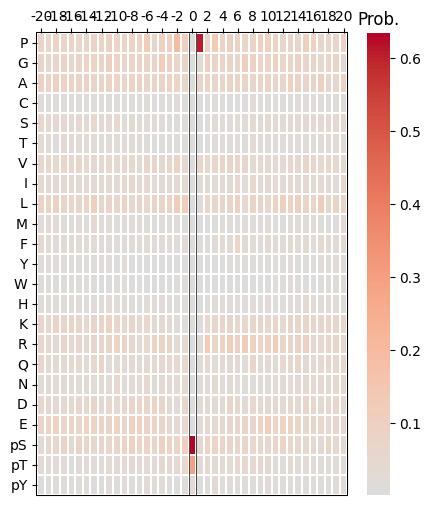

B5DE93_CDK12_XENTR_KD1


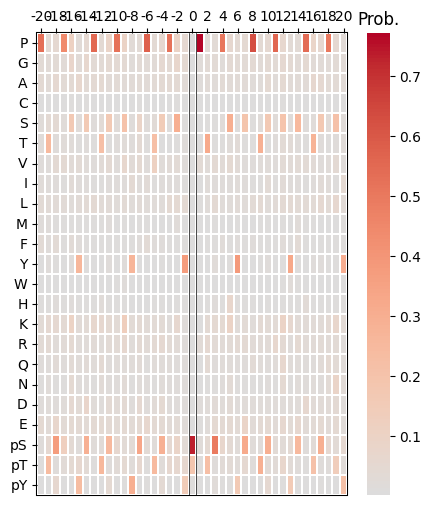

D2H526_CDK12_AILME_KD1


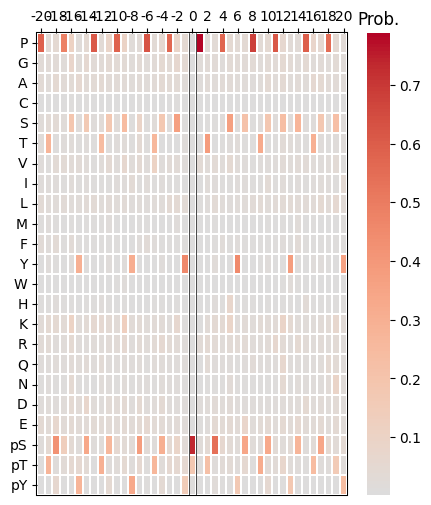

E1BB50_CDK12_BOVIN_KD1


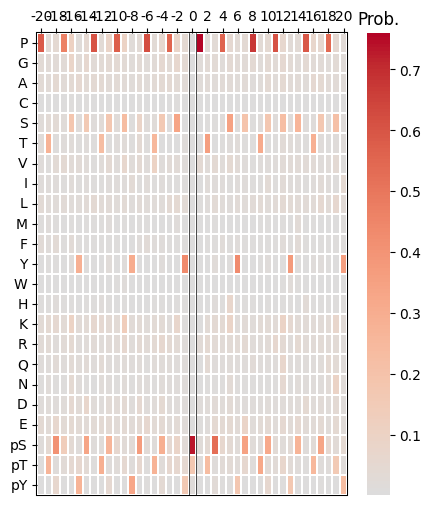

E1BB52_CDK13_BOVIN_KD1


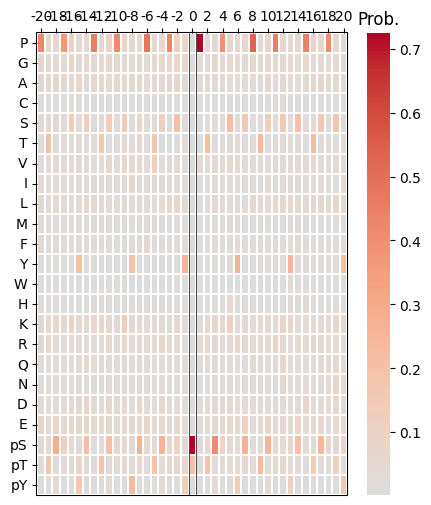

O35831_CDK17_RAT_KD1


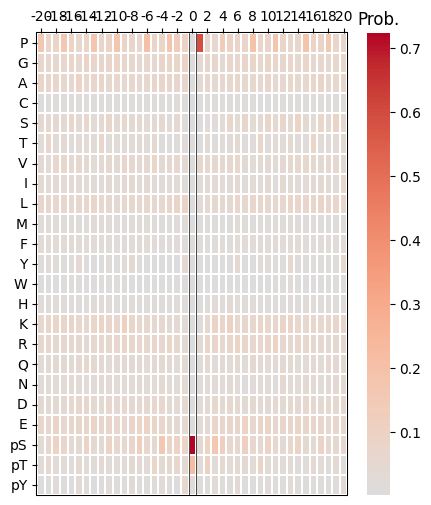

O55076_CDK2_CRIGR_KD1


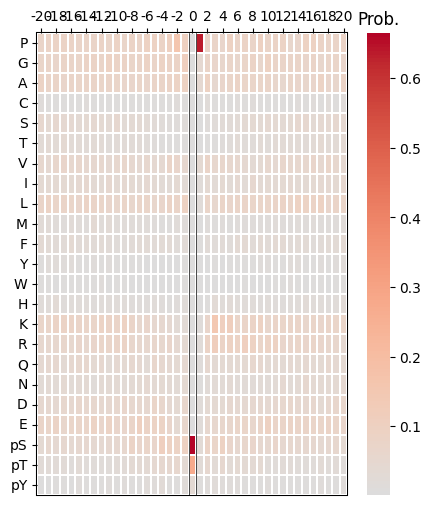

P11440_CDK1_MOUSE_KD1


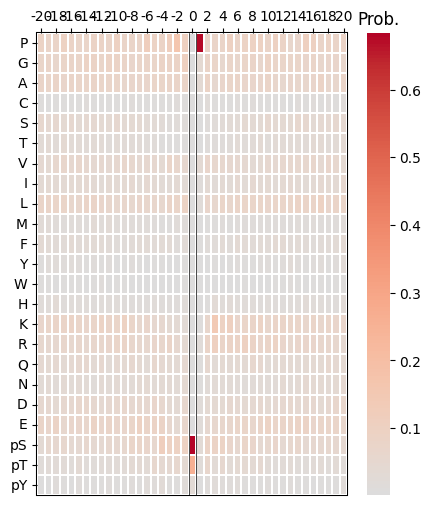

P13863_CDK1_CHICK_KD1


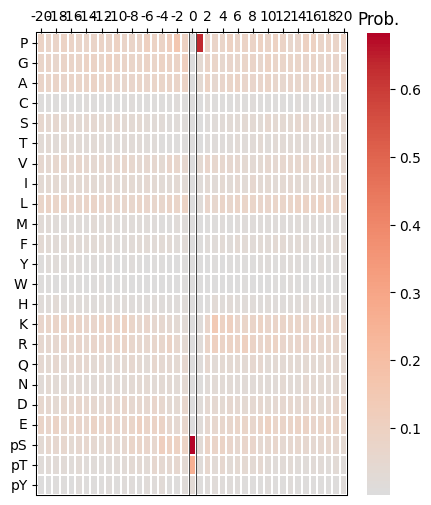

P20911_CDK7_XENLA_KD1


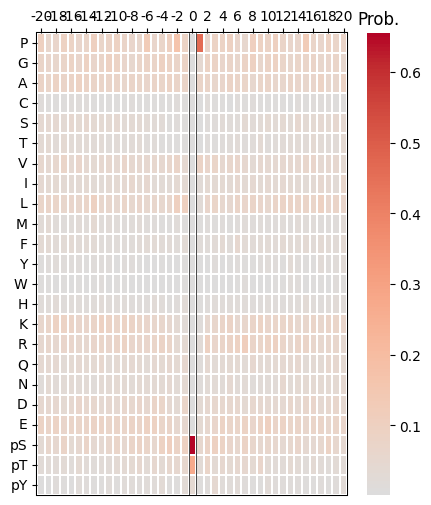

P23111_CDC2_MAIZE_KD1


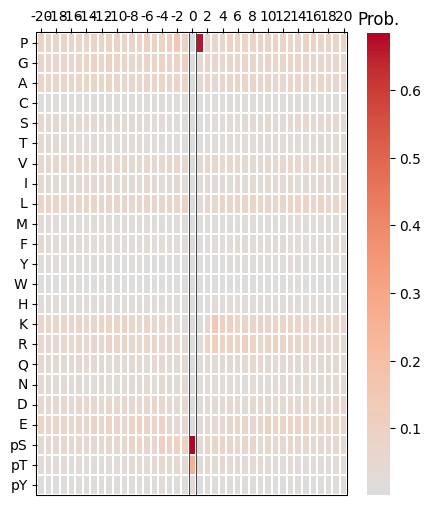

P23437_CDK2_XENLA_KD1


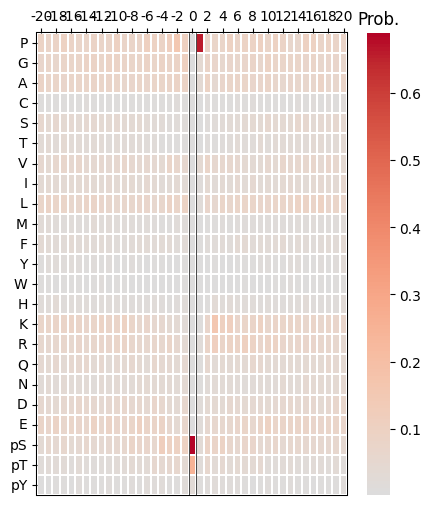

P24033_CDK1B_XENLA_KD1


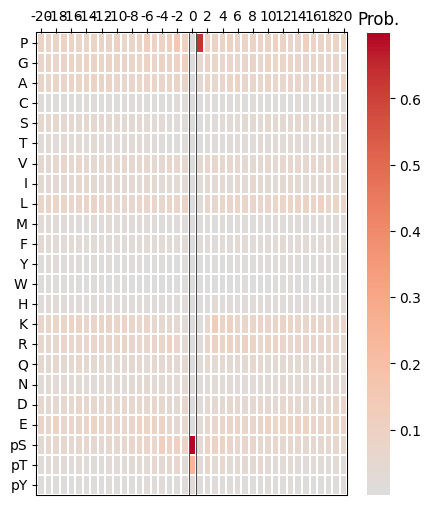

P24100_CDKA1_ARATH_KD1


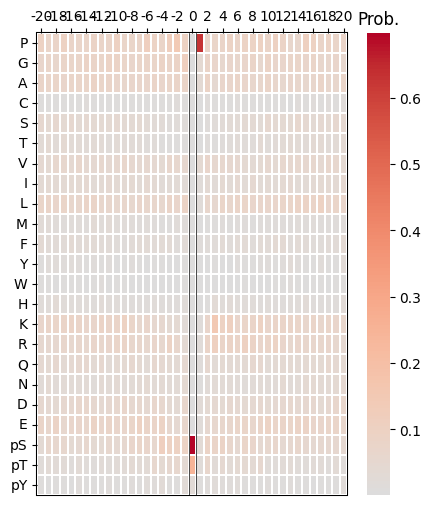

P29618_CDKA1_ORYSJ_KD1


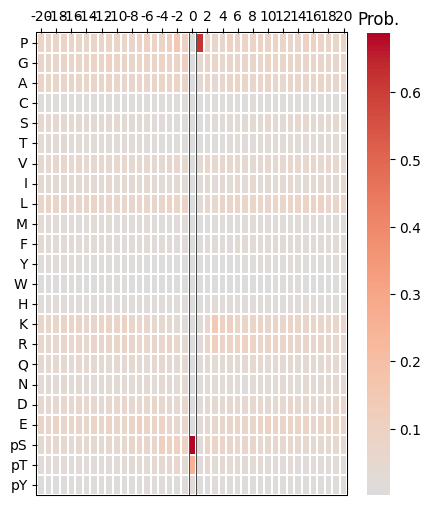

P30285_CDK4_MOUSE_KD1


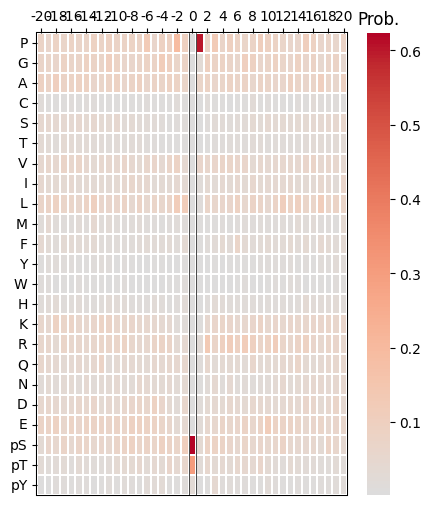

P35426_CDK4_RAT_KD1


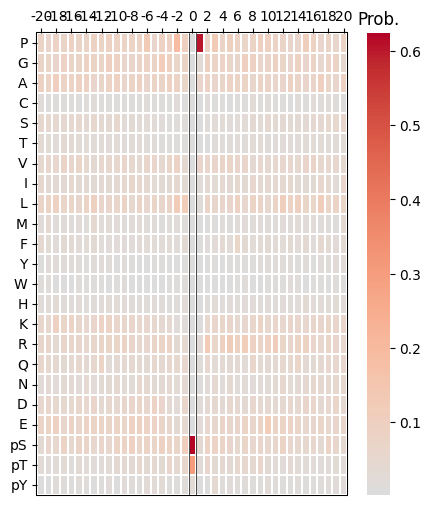

P35567_CDK1A_XENLA_KD1


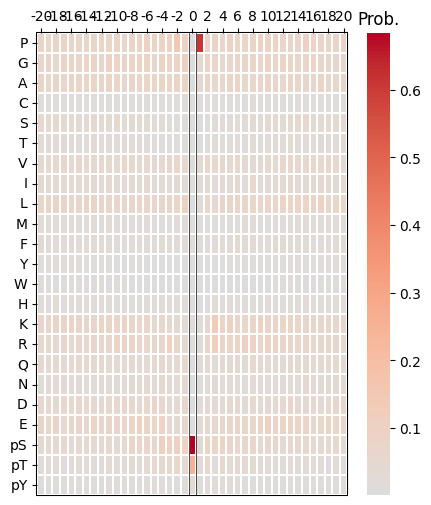

P39951_CDK1_RAT_KD1


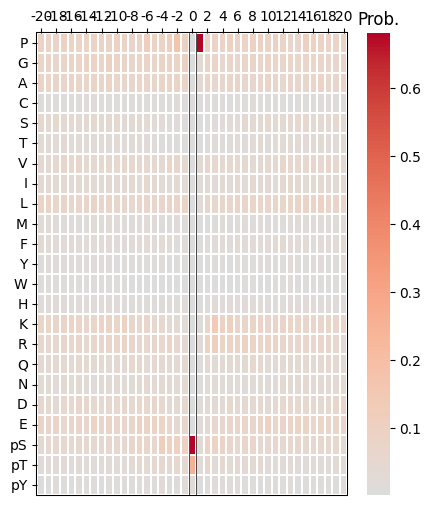

P43063_CDK1_CANAL_KD1


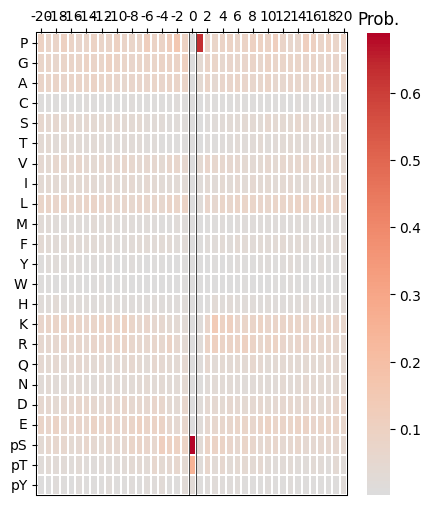

In [54]:
for i in cdks.head(20).index:
    print(i)
    plot_heatmap(recover_pssm(pred.loc[i]))
    plt.show()
    plt.close()